<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/content/customer_segmentation.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.drop(columns=["ID","Dt_Customer"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [7]:
numerical_columns=df.select_dtypes(include=np.number).columns
categorical_columns=df.select_dtypes(exclude=np.number).columns

In [8]:
numerical_columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

In [10]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [13]:
df.duplicated().sum()

182

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [17]:
df["Income"].fillna(df["Income"].mean(),inplace=True)

In [18]:
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [19]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder

In [21]:
scaler=StandardScaler()

In [23]:
X_scaled=scaler.fit_transform(df[numerical_columns])

In [24]:
ohe=OneHotEncoder(drop="first")

In [26]:
X_scaled_C=ohe.fit_transform(df[categorical_columns]).toarray()

In [27]:
concatened_data=np.concatenate((X_scaled,X_scaled_C),axis=1)

In [28]:
concatened_data

array([[-0.98464486,  0.22782346, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23525074, -0.23703   ,  1.03162491, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31636252,  0.75893254, -0.82909732, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.02020216,  0.182221  , -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06818015,  0.66559923, -0.82909732, ...,  1.        ,
         0.        ,  0.        ],
       [-1.23525074,  0.02014898,  1.03162491, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
from sklearn.cluster import KMeans

In [33]:
wccs=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(concatened_data)
  wccs.append(kmeans.inertia_)

In [34]:
wccs

[50026.782312925214,
 39719.992040910016,
 36415.42547900348,
 34085.658643173105,
 32187.520435406695,
 30265.19212671707,
 29979.669586063403,
 28240.827014185736,
 26933.016492100316,
 25927.46137203628]

In [35]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'WCSS')

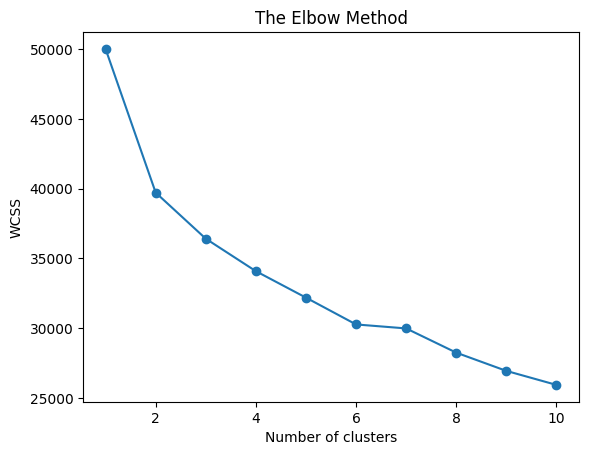

In [36]:
plt.scatter(range(1,11),wccs)
plt.plot(range(1,11),wccs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [38]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(concatened_data)
y_kmeans=kmeans.predict(concatened_data)

In [39]:
y_kmeans

array([0, 3, 0, ..., 2, 2, 3], dtype=int32)

In [40]:
concatened_data[y_kmeans==0]

array([[-9.84644861e-01,  2.27823464e-01, -8.29097318e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.16362521e-01,  7.58932540e-01, -8.29097318e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.17574276e-01,  4.20756965e-01, -8.29097318e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.69596280e-01,  2.86777523e-16, -8.29097318e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.86060988e-01,  2.42125911e+01,  1.03162491e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.49291937e-01,  3.49416896e-01, -8.29097318e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [41]:
concatened_data[y_kmeans==1]

array([[-1.90353308,  1.19986146, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31636252,  1.27151685, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.15171545,  1.18346507, -0.82909732, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.10131394,  0.52611166, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5189904 ,  1.05694484, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06818015,  1.25177023, -0.82909732, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
concatened_data[y_kmeans==2]

array([[-0.14929194,  0.40026148, -0.82909732, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18484923,  0.12916921, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.40232132,  0.27575138,  1.03162491, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.10131394, -0.29780701, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02020216,  0.182221  , -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06818015,  0.66559923, -0.82909732, ...,  1.        ,
         0.        ,  0.        ]])

In [43]:
concatened_data[y_kmeans==3]

array([[-1.23525074, -0.23703   ,  1.03162491, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.27080803, -1.01341491,  1.03162491, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.02020216,  0.2339327 ,  1.03162491, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.27080803, -1.62961968,  1.03162491, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.43787862, -1.00671446, -0.82909732, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23525074,  0.02014898,  1.03162491, ...,  0.        ,
         0.        ,  0.        ]])

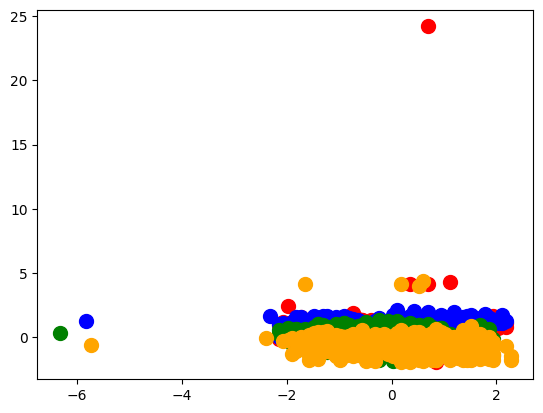

In [46]:
plt.scatter(concatened_data[y_kmeans==0,0],concatened_data[y_kmeans==0,1],s=100,c="red",label="Cluster 1")
plt.scatter(concatened_data[y_kmeans==1,0],concatened_data[y_kmeans==1,1],s=100,c="blue",label="Cluster 2")
plt.scatter(concatened_data[y_kmeans==2,0],concatened_data[y_kmeans==2,1],s=100,c="green",label="Cluster 3")
plt.scatter(concatened_data[y_kmeans==3,0],concatened_data[y_kmeans==3,1],s=100,c="orange",label="Cluster 4")

In [47]:
# prompt: any way to check accuracy in kmeans

# K-means doesn't have a traditional accuracy metric like classification.
# Instead, we can evaluate it based on how well it clusters the data.

# Here are some common methods:

# 1. Silhouette Score:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(concatened_data, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# A higher silhouette score indicates better-defined clusters.

# 2. Davies-Bouldin Index:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(concatened_data, y_kmeans)
print("Davies-Bouldin Index:", db_index)

# A lower Davies-Bouldin index indicates better clustering.

# 3. Visualize the clusters:
# As you've already done, visualizing the clusters can help understand the quality of clustering.
# Look for well-separated clusters with minimal overlap.


Silhouette Score: 0.17204892956860537
Davies-Bouldin Index: 2.160229670836279


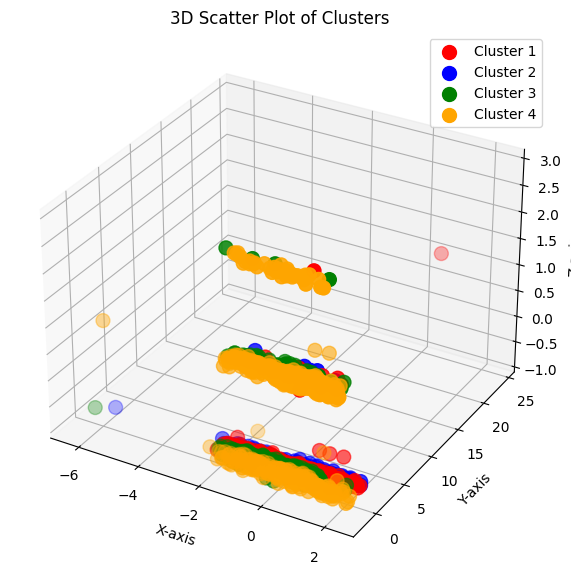

In [45]:
# prompt: graph on 3d

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data in 'concatened_data' and 'y_kmeans'

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(concatened_data[y_kmeans == 0, 0], concatened_data[y_kmeans == 0, 1], concatened_data[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(concatened_data[y_kmeans == 1, 0], concatened_data[y_kmeans == 1, 1], concatened_data[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(concatened_data[y_kmeans == 2, 0], concatened_data[y_kmeans == 2, 1], concatened_data[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(concatened_data[y_kmeans == 3, 0], concatened_data[y_kmeans == 3, 1], concatened_data[y_kmeans == 3, 2], s=100, c='orange', label='Cluster 4')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()
